#Data

https://drive.google.com/file/d/19lyUUPfmkLCh27aHJIHNYjZwWmompsuG/view?usp=sharing


#Downloading data

In [ ]:
!gdown --id 19lyUUPfmkLCh27aHJIHNYjZwWmompsuG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19lyUUPfmkLCh27aHJIHNYjZwWmompsuG
From (redirected): https://drive.google.com/uc?id=19lyUUPfmkLCh27aHJIHNYjZwWmompsuG&confirm=t&uuid=9d1718ca-fe60-44bc-8c1e-93ef85368aed
To: /content/Brats2019.zip
100% 66.0M/66.0M [00:02<00:00, 23.5MB/s]


# Unzip

In [ ]:
!unzip Brats2019.zip

Archive:  Brats2019.zip
  inflating: dataset/test/N1.jpeg    
  inflating: dataset/test/N2.jpeg    
  inflating: dataset/test/N3.jpg     
  inflating: dataset/test/Y1.jpg     
  inflating: dataset/test/Y2.jpg     
  inflating: dataset/test/Y3.jpg     
  inflating: dataset/train/no/No12.jpg  
  inflating: dataset/train/no/No13.jpg  
  inflating: dataset/train/no/No14.jpg  
  inflating: dataset/train/no/No15.jpg  
  inflating: dataset/train/no/No17.jpg  
  inflating: dataset/train/no/No18.jpg  
  inflating: dataset/train/no/No19.jpg  
  inflating: dataset/train/no/no0.jpg  
  inflating: dataset/train/no/no1.jpg  
  inflating: dataset/train/no/no10.jpg  
  inflating: dataset/train/no/no100.jpg  
  inflating: dataset/train/no/no1000.jpg  
  inflating: dataset/train/no/no1001.jpg  
  inflating: dataset/train/no/no1002.jpg  
  inflating: dataset/train/no/no1003.jpg  
  inflating: dataset/train/no/no1004.jpg  
  inflating: dataset/train/no/no1005.jpg  
  inflating: dataset/train/no/no1006.jpg

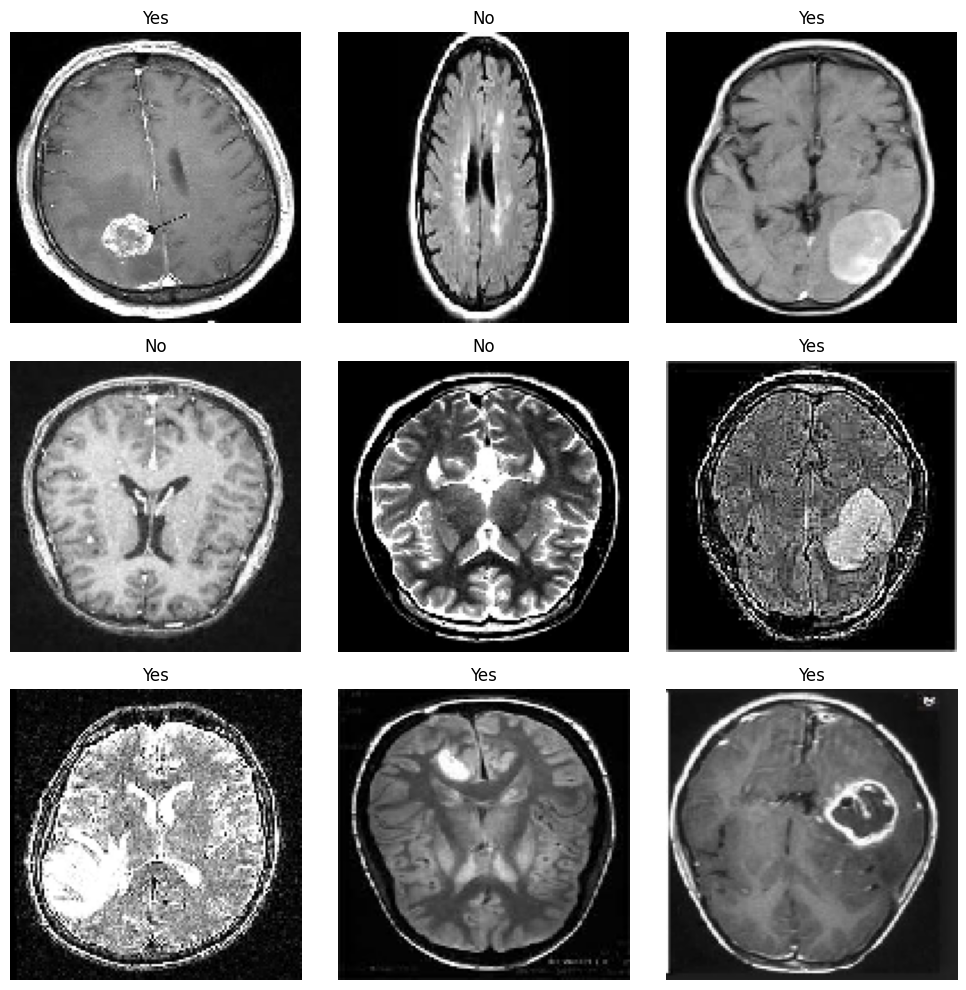

Training set: 2800 images
Validation set: 200 images


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


def load_data(base_path):
    images = []
    labels = []

    for label, subfolder in enumerate(["no", "yes"]):
        folder_path = os.path.join(base_path, subfolder)
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(label)

    images = np.array(images, dtype="float32") / 255.0  # Normalize images to [0, 1]
    labels = np.array(labels)
    return images, labels


train_images, train_labels = load_data("dataset/train")
valid_images, valid_labels = load_data("dataset/valid")


train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
valid_generator = valid_datagen.flow(valid_images, valid_labels, batch_size=32)


def visualize_data(images, labels, class_names=['No', 'Yes']):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        index = np.random.randint(0, len(images))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[index])
        plt.title(class_names[labels[index]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_data(train_images, train_labels)

print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

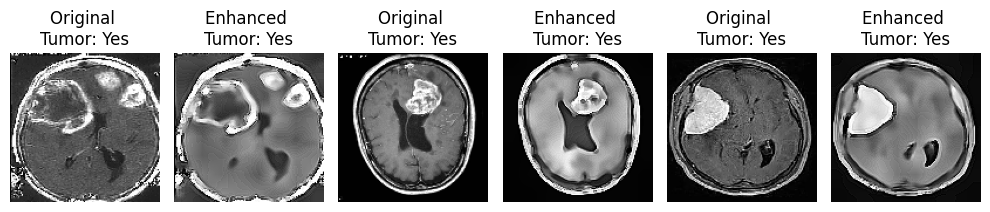

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_preprocessed_images(images,labels, class_names=['Original', 'Enhanced'], n_samples=3, clebel=['No', 'Yes']):
    plt.figure(figsize=(10, 10))

    for i in range(n_samples):
        index = np.random.randint(0, len(images))
        latest_image = images[index]

        if latest_image.dtype != np.uint8:
            latest_image = cv2.normalize(latest_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        if len(latest_image.shape) == 3:
            latest_image = cv2.cvtColor(latest_image, cv2.COLOR_BGR2GRAY)

        denoised_image = cv2.medianBlur(latest_image, 5)

        nlm_denoised_image = cv2.fastNlMeansDenoising(denoised_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        sharpened_image = cv2.filter2D(nlm_denoised_image, -1, kernel)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        contrast_enhanced_image = clahe.apply(sharpened_image)


        ax = plt.subplot(3, 6, 2 * i + 1)
        plt.imshow(latest_image, cmap='gray')
        plt.title(class_names[0] + " \nTumor: " + clebel[labels[index]])
        plt.axis("off")

        ax = plt.subplot(3, 6, 2 * i + 2)
        plt.imshow(contrast_enhanced_image, cmap='gray')
        plt.title(class_names[1] + " \nTumor: " + clebel[labels[index]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualize_preprocessed_images(train_images,labels = train_labels, n_samples=3)

In [ ]:
def preprocess_images(images):

  preprocessed_images = []
  for image in images:
    if image.dtype != np.uint8:
      image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    if len(image.shape) == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    denoised_image = cv2.medianBlur(image, 5)

    nlm_denoised_image = cv2.fastNlMeansDenoising(denoised_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(nlm_denoised_image, -1, kernel)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced_image = clahe.apply(sharpened_image)

    preprocessed_images.append(contrast_enhanced_image)

  return np.asarray(preprocessed_images)

train_images_preprocessed = preprocess_images(train_images)
valid_images_preprocessed = preprocess_images(valid_images)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def creating_fourth_channel(images):
    augmented_images = []
    k = 3  # Number of clusters

    for image in images:

        pixel_values = image.reshape((-1, 1))
        pixel_values = np.float32(pixel_values)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        centers = np.uint8(centers)
        segmented_image = centers[labels.flatten()]
        segmented_image = segmented_image.reshape(image.shape)

        augmented_image = np.concatenate([image[..., np.newaxis], segmented_image[..., np.newaxis]], axis=-1)
        augmented_images.append(augmented_image)

    return np.array(augmented_images)


train_images_augmented = creating_fourth_channel(train_images_preprocessed)
valid_images_augmented = creating_fourth_channel(valid_images_preprocessed)

print(f"Train augmented shape: {train_images_augmented.shape}")  # Should be (N, H, W, 4)
print(f"Validation augmented shape: {valid_images_augmented.shape}")


Train augmented shape: (2800, 128, 128, 2)
Validation augmented shape: (200, 128, 128, 2)


In [ ]:
def Shallow_CNN():
    input_layer = tf.keras.Input(shape=(128, 128, 2))

    # Output Layer
    conv1 = tf.keras.layers.Conv2D(32, (7, 7), activation='relu', padding='same')(input_layer)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    flat = tf.keras.layers.Flatten()(conv2)
    dense = tf.keras.layers.Dense(128, activation='relu')(flat)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

    model = tf.keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adagrad',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Shallow_CNN_model = Shallow_CNN()

Shallow_CNN_history = Shallow_CNN_model.fit(
    train_images_augmented, train_labels,
    validation_data=(valid_images_augmented, valid_labels),
    epochs=10,
    batch_size=16
)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7209 - loss: 198.0206 - val_accuracy: 0.8800 - val_loss: 1.3161
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9751 - loss: 0.1678 - val_accuracy: 0.9200 - val_loss: 0.6854
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9450 - val_loss: 0.6402
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 6.3337e-04 - val_accuracy: 0.9350 - val_loss: 0.7348
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 3.1550e-04 - val_accuracy: 0.9350 - val_loss: 0.6729
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 2.7200e-04 - val_accuracy: 0.9350 - val_loss: 0.6802
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 2.5147e-04 - val_accuracy: 0.9350 - val_loss: 0.6831
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 1.0000 - loss

In [ ]:
Shallow_CNN_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 2)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │           3,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,152,708 (256.17 MB)

 Trainable params: 33,576,353 (128.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,576,355 (128.08 MB)

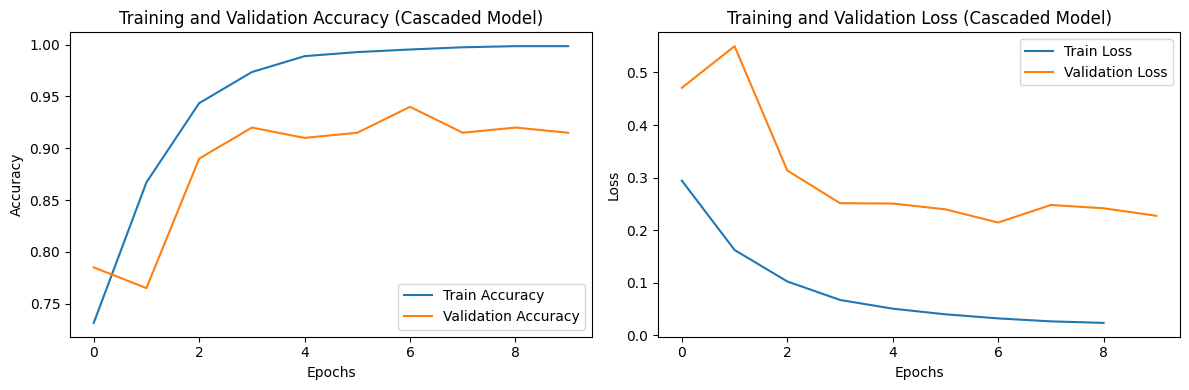

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(Shallow_CNN_history.history['accuracy'], label='Train Accuracy')
plt.plot(Shallow_CNN_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Cascaded Model)')

# Loss
plt.subplot(1, 2, 2)
plt.plot(Shallow_CNN_history.history['loss'][1:], label='Train Loss')
plt.plot(Shallow_CNN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Cascaded Model)')

plt.tight_layout()
plt.show()


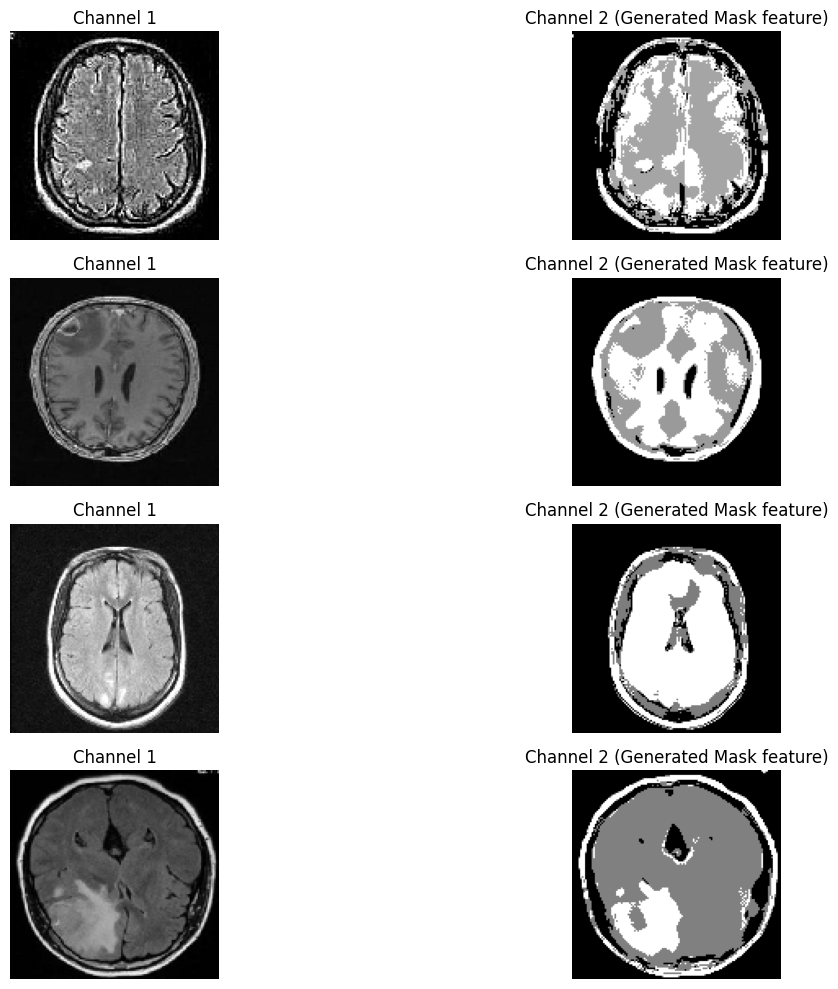

In [ ]:
import matplotlib.pyplot as plt
import random

def visualize_cascaded_inputs(concatenated_images,demo_images_aug, num_samples=4):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        concatenated_image = concatenated_images[i]
        demo_image_aug = demo_images_aug[i]
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(concatenated_image[:, :, 0], cmap='gray')
        plt.title("Channel 1")
        plt.axis("off")


        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(demo_image_aug[:,:,1], cmap='gray')
        plt.title(f"Channel 2 (Generated Mask feature)")
        plt.axis("off")
    plt.tight_layout()  # Adjust layout for clarity
    plt.show()


random_indices = random.sample(range(len(train_images)), 4)
demo_images = [train_images[i] for i in random_indices]
demo_images_aug = [train_images_augmented[i] for i in random_indices]

visualize_cascaded_inputs(demo_images,demo_images_aug)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


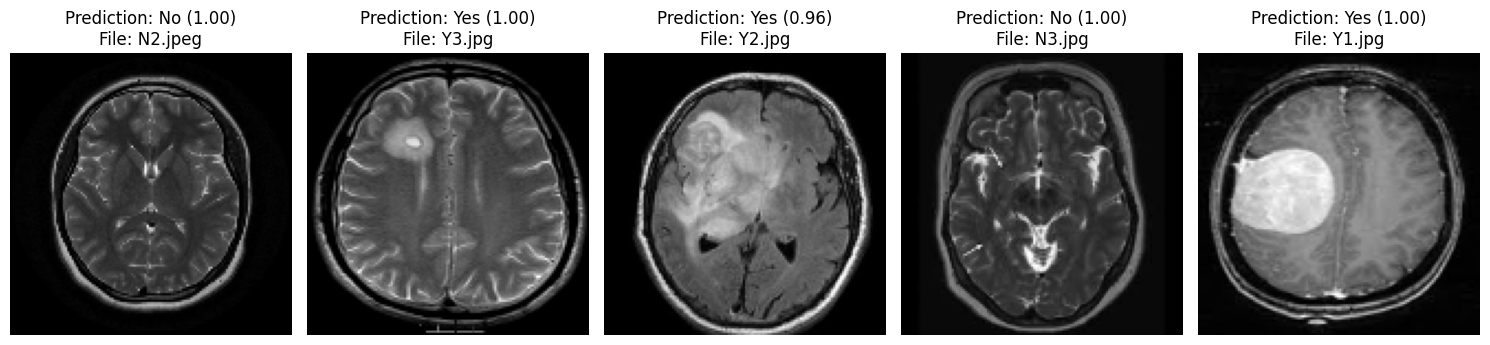

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

def load_test_images(folder_path, target_size=(128, 128)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)
            images.append(img)
            filenames.append(filename)
    return np.array(images), filenames



def visualize_predictions(model, test_images, filenames, num_samples):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image = test_images[i, :, :, 0]
        filename = filenames[i]

        prediction = model.predict(test_images[i][np.newaxis, ...])[0][0]
        prediction_label = 'Yes' if prediction > 0.8 else 'No'
        prediction_prob = prediction if prediction > 0.8 else 1 - prediction

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"Prediction: {prediction_label} ({prediction_prob:.2f})\nFile: {filename}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


folder_path = "dataset/test/"
test_images, filenames = load_test_images(folder_path)

test_images_augmented = creating_fourth_channel(test_images)

Shallow_CNN_predictions = Shallow_CNN_model.predict(test_images_augmented)

visualize_predictions(Shallow_CNN_model, test_images_augmented, filenames, num_samples=5)
